In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
print("Loading dataset...")
data = pd.read_csv("data/student_allinone_300_padded.csv")





Loading dataset...


In [7]:
print("\nDataset Preview:")
print(data.head())


Dataset Preview:
  StudentID  Year  GradeLevel Semester    Term  Subject SubjectType  \
0   STU0001  2024           5     Fall    Fall  History    Elective   
1   STU0001  2024           5     Fall    Fall  History    Elective   
2   STU0001  2024           5     Fall    Fall  Reading        Core   
3   STU0002  2023           4   Spring  Spring  Science        Core   
4   STU0002  2023           4   Spring  Spring  History    Elective   

       ClassName    ItemType  ItemNumber  ...  AssignmentAvg  TestScore  \
0  World History     Pretest           1  ...             74         42   
1  World History  Assignment           2  ...             78         56   
2    English Lit        Test           3  ...             75         94   
3  Earth Science     Pretest           1  ...             83         71   
4  World History  Assignment           2  ...             52         89   

  Attendance StudyHours  ParentalSupport  SleepHours  ReadingHours  \
0         96          5           

In [9]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StudentID               900 non-null    object 
 1   Year                    900 non-null    int64  
 2   GradeLevel              900 non-null    int64  
 3   Semester                900 non-null    object 
 4   Term                    900 non-null    object 
 5   Subject                 900 non-null    object 
 6   SubjectType             900 non-null    object 
 7   ClassName               900 non-null    object 
 8   ItemType                900 non-null    object 
 9   ItemNumber              900 non-null    int64  
 10  PossiblePoints          900 non-null    int64  
 11  Score                   900 non-null    int64  
 12  DueDate                 900 non-null    object 
 13  SubmittedDate           900 non-null    object 
 14  PretestScore        

In [13]:
features = ['Year', 'GradeLevel', 'Subject', 'Semester', 'Term']
target = 'Score'

X = data[features]
y = data[target]

In [17]:
encoder = LabelEncoder()

for column in X.columns:
    X[column] = encoder.fit_transform(X[column])

print("\nEncoded Feature Preview:")
print(X.head())


Encoded Feature Preview:
   Year  GradeLevel  Subject  Semester  Term
0     1           1        0         0     0
1     1           1        0         0     0
2     1           1        2         0     0
3     0           0        3         1     1
4     0           0        0         1     1


/var/folders/cc/xrgddgmj6hd__n7m5nmvcgsw0000gn/T/ipykernel_2262/1201695918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
/var/folders/cc/xrgddgmj6hd__n7m5nmvcgsw0000gn/T/ipykernel_2262/1201695918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
/var/folders/cc/xrgddgmj6hd__n7m5nmvcgsw0000gn/T/ipykernel_2262/1201695918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Split Completed")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Data Split Completed
Training samples: 720
Testing samples: 180


In [21]:
print("\nTraining Linear Regression Model...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)


Training Linear Regression Model...


In [23]:
print("\nTraining Decision Tree Regression Model...")
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)


Training Decision Tree Regression Model...


In [25]:
print("\nTraining Random Forest Regression Model...")
forest_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)


Training Random Forest Regression Model...


In [32]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Results for {model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))
    print("-----------------------------------")

In [34]:
evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, tree_predictions, "Decision Tree Regression")
evaluate_model(y_test, forest_predictions, "Random Forest Regression")


Evaluation Results for Linear Regression
MAE : 14.559367635863413
RMSE: 17.002421008494895
R2  : -0.0015379973557752002
-----------------------------------

Evaluation Results for Decision Tree Regression
MAE : 15.002757141522622
RMSE: 17.75113043439214
R2  : -0.09168647376734085
-----------------------------------

Evaluation Results for Random Forest Regression
MAE : 14.992849070304123
RMSE: 17.736310747854887
R2  : -0.08986442665466332
-----------------------------------


In [40]:
print("\nSample Prediction (New Student Data)")

sample_input = pd.DataFrame({
    'Year': [2024],
    'GradeLevel': [10],
    'Subject': ['Math'],
    'Semester': [1],
    'Term': [1]
})


Sample Prediction (New Student Data)


In [42]:
for column in sample_input.columns:
    sample_input[column] = encoder.fit_transform(sample_input[column])

predicted_score = forest_model.predict(sample_input)

print("Predicted Student Score:", predicted_score[0])


print("\nPrototype execution completed successfully.")

Predicted Student Score: 71.9331818736819

Prototype execution completed successfully.


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/student_allinone_300_padded.csv")

# Verify
print(df.head())


  StudentID  Year  GradeLevel Semester    Term  Subject SubjectType  \
0   STU0001  2024           5     Fall    Fall  History    Elective   
1   STU0001  2024           5     Fall    Fall  History    Elective   
2   STU0001  2024           5     Fall    Fall  Reading        Core   
3   STU0002  2023           4   Spring  Spring  Science        Core   
4   STU0002  2023           4   Spring  Spring  History    Elective   

       ClassName    ItemType  ItemNumber  ...  AssignmentAvg  TestScore  \
0  World History     Pretest           1  ...             74         42   
1  World History  Assignment           2  ...             78         56   
2    English Lit        Test           3  ...             75         94   
3  Earth Science     Pretest           1  ...             83         71   
4  World History  Assignment           2  ...             52         89   

  Attendance StudyHours  ParentalSupport  SleepHours  ReadingHours  \
0         96          5                5           9

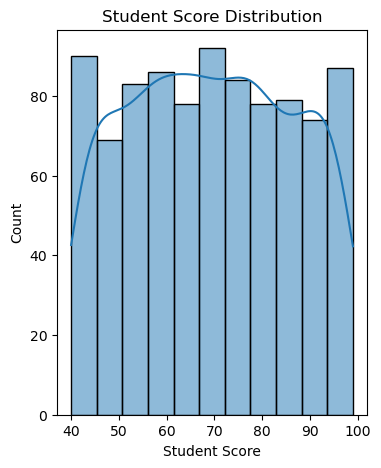

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = df['Score']

plt.figure(figsize=(4, 5))
sns.histplot(scores, kde=True)
plt.title("Student Score Distribution")
plt.xlabel("Student Score")
plt.ylabel("Count")
plt.show()


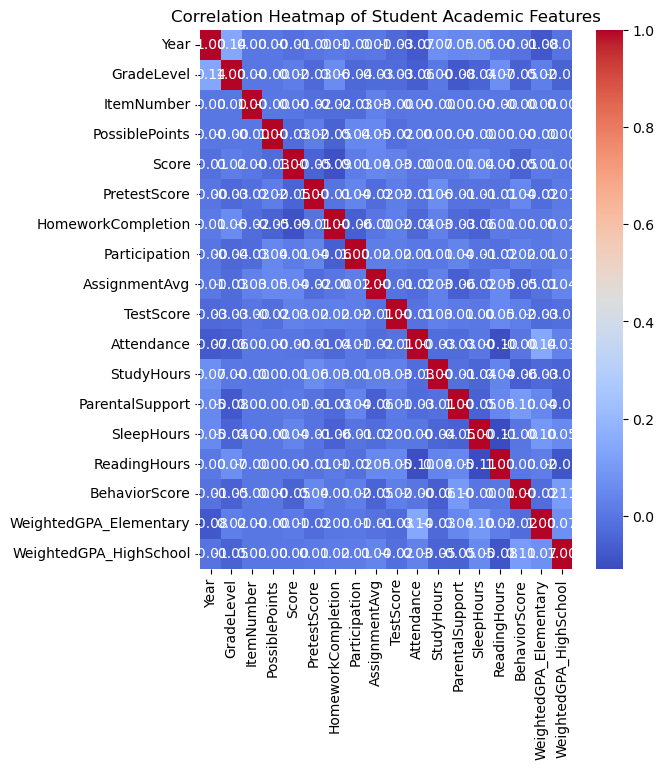

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns automatically
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6, 7))
sns.heatmap(
    numerical_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Student Academic Features")
plt.show()
